In [1]:
from IPython.display import Image

-----------------------------
#### Document similarity - Jaccard
-------------------------------

####  Jaccard Similarity/ Index

- also known as `Intersection over Union` and the `Jaccard similarity` coefficient

- Jaccard similarity or intersection over union is defined as size of intersection divided by size of union of two sets. Let’s take example of two sentences:

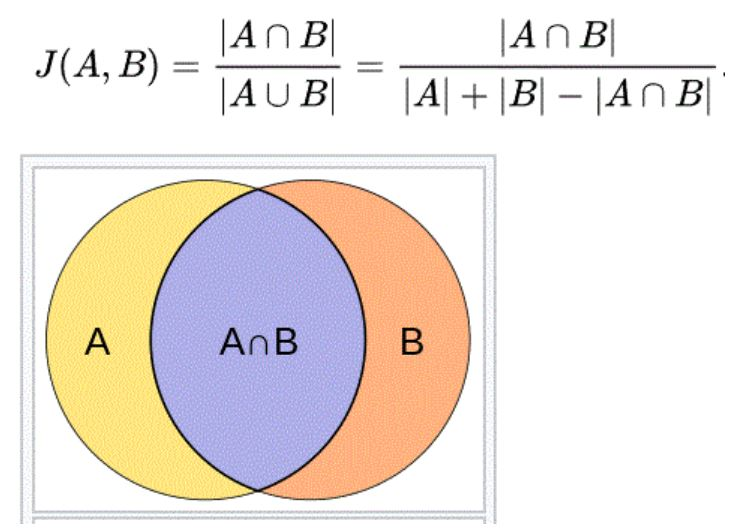

In [3]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\dist-jaccard-00.JPG', width=400)

#### The Jaccard distance, 
- measures dissimilarity between sample sets, is `complementary to the Jaccard Index` and is obtained by subtracting the `Jaccard index` from 1


In [49]:
a = [0, 1, 2, 5, 6, 8, 9]
b = [11,12,13,14,15,16,9]

get the intersection

In [50]:
intersection_set = set(a).intersection(b)
intersection_set

{9}

get union set

In [51]:
set(a).union(b)

{0, 1, 2, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16}

In [86]:
# define Jaccard Similarity/Index function
def jaccard_custom(list1, list2):
    
    intersection_set = set(list1).intersection(list2)  
    intersection_len = len(list(intersection_set))
    
    union_set        = set(list1).union(list2)
    union_len        = len(list(union_set)) 
    
    return float(intersection_len) / union_len

In [87]:
# find Jaccard Similarity between the two sets 
jaccard_custom(a, b)

0.07692307692307693

using `NLTK.jaccard_distance` ..

In [99]:
import nltk

# similarity/ Index
1 - nltk.jaccard_distance(set(a), set(b))

0.07692307692307687

... another example ...

In [90]:
w1 = set('abcdddd')
w2 = set('abc')
 
print('Jaccard similarity using NLTK   : ', (1 - nltk.jaccard_distance(w1, w2)))
print('Jaccard similarity using custom : ', jaccard_custom(list(w1), list(w2)))

Jaccard similarity using NLTK   :  0.75
Jaccard similarity using custom :  0.75


... another example ...

In [109]:
str1 = 'AI is our friend and it has been friendly'
str2 = 'AI and humans have always been friendly'

In [110]:
print('Jaccard similarity using NLTK   : ', (1 - nltk.jaccard_distance(set(str1.split()), set(str2.split()))))
print('Jaccard similarity using custom : ', jaccard_custom(str1.split(), str2.split()))


Jaccard similarity using NLTK   :  0.33333333333333337
Jaccard similarity using custom :  0.3333333333333333


... using `scipy distance.jaccard` ..

In [111]:
from scipy.spatial import distance

In [112]:
str1 = 'AI is our friend and it has been friendly'
str2 = 'AI and humans have always been friendly'

In [113]:
distance.jaccard(set(str1.split()), set(str2.split()))

1.0

In [115]:
a = [0, 1, 2, 5, 6, 8, 9]
b = [11,12,13,14,15,16,9]

In [117]:
1 - distance.jaccard(a, b)

0.1428571428571429

... another example ...

In [118]:
def jaccard_custom_1(query, document):
    intersection = set(query).intersection(set(document))
    union        = set(query).union(set(document))
    return len(intersection)/len(union)

In [120]:
tokenize = lambda doc: doc.lower().split(" ")

In [121]:
document_0 = "China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy."
document_1 = "At last, China seems serious about confronting an endemic problem: domestic violence and corruption."
document_2 = "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people."
document_3 = "Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled."
document_4 = "What's the future of Abenomics? We asked Shinzo Abe for his views"
document_5 = "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily."
document_6 = "Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses."

In [122]:
all_documents = [document_0, document_1, document_2, document_3, document_4, document_5, document_6]
all_documents

['China has a strong economy that is growing at a rapid pace. However politically it differs greatly from the US Economy.',
 'At last, China seems serious about confronting an endemic problem: domestic violence and corruption.',
 "Japan's prime minister, Shinzo Abe, is working towards healing the economic turmoil in his own country for his view on the future of his people.",
 'Vladimir Putin is working hard to fix the economy in Russia as the Ruble has tumbled.',
 "What's the future of Abenomics? We asked Shinzo Abe for his views",
 "Obama has eased sanctions on Cuba while accelerating those against the Russian Economy, even as the Ruble's value falls almost daily.",
 'Vladimir Putin was found to be riding a horse, again, without a shirt on while hunting deer. Vladimir Putin always seems so serious about things - even riding horses.']

In [125]:
tokenized_documents = [tokenize(d) for d in all_documents] # tokenized docs
all_tokens_set      = set([item for sublist in tokenized_documents for item in sublist])

In [128]:
# comparing document_2 and document_4
jaccard_custom_1(tokenized_documents[2], tokenized_documents[4])

0.21428571428571427

Document length has a big effect and common words carry the same weight as non common words.


Let's take a look at the intersection to understand

In [129]:
set(tokenized_documents[2]).intersection(set(tokenized_documents[4]))


{'for', 'future', 'his', 'of', 'shinzo', 'the'}

"his" and "the" have the same weight as "future" and "shinzo"

In [130]:
jaccard_custom_1(tokenized_documents[1],tokenized_documents[6])

0.08333333333333333

In [131]:
set(tokenized_documents[1]).intersection(set(tokenized_documents[6]))

{'about', 'seems', 'serious'}

These documents have nothing in common. However they are rated as 8% relevant. -- fundamental issues with Jaccard Similarity:

- Length is irrelevant. (bias towards longer documents).
- Words that appear in a lot of documents are weighted the same as those that appear in few. (bias towards longer documents as well as non-descriptive words)

Unlike Edit Distance, you cannot just run Jaccard Distance on the strings directly; you must first convert them to the set type.

#### Example - basic spell checker

In [2]:
import nltk
 
mistake = "ligting"
 
words = ['apple', 'bag', 'drawing', 'listing', 'linking', 'living', 'lighting', 'orange', 'walking', 'zoo']
 
for word in words:
    jd = nltk.jaccard_distance(set(mistake), set(word))
    print('{:20s} distance of {:.2f}'.format(word, jd))

apple                distance of 0.88
bag                  distance of 0.86
drawing              distance of 0.67
listing              distance of 0.17
linking              distance of 0.33
living               distance of 0.33
lighting             distance of 0.17
orange               distance of 0.78
walking              distance of 0.50
zoo                  distance of 1.00


# Hamming distance

Compute the Hamming distance between two 1-D arrays.

The Hamming distance between 1-D arrays u and v, is simply the proportion of disagreeing components in u and v.

In information theory, the Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the other.

In [3]:
data_dict = {'num_doors':   pd.Series(data= [2, 4, 2, 2]),
             'num_cyl':     pd.Series(data= [2, 3, 4, 8]),
             'cruise_ctrl': pd.Series(data= [0, 0, 1, 1]),
             'price_cat':   pd.Series(data= [1, 2, 2, 4])
            }

In [4]:
df = pd.DataFrame(data_dict)
df

,cruise_ctrl,num_cyl,num_doors,price_cat
0,0,2,2,1
1,0,3,4,2
2,1,4,2,2
3,1,8,2,4


In [10]:
a = df.iloc[1].values
b = df.iloc[2].values

In [11]:
a

array([0, 3, 4, 2], dtype=int64)

In [13]:
distance.hamming(a, b)

0.75

# scipy.spatial.distance.braycurtis - Dissimilarity

For a simple example, consider two aquariums;

Tank one: 6 goldfish, 7 guppies and 4 rainbow fish,
Tank two: 10 goldfish           and 6 rainbow fish.


To calculate Bray-Curtis,
- let’s first calculate Cij (the sum of only the lesser counts for each species found in both sites). 
- Goldfish are found on both sites; the lesser count is 6. 
- Guppies are only on one site, so they can’t be added in here. 
- Rainbow fish, though, are on both, and the lesser count is 4.

So Cij = 6 + 4 = 10.

Si (total number of specimens counted on site i) = 6 + 7 + 4 = 17, and
Sj (total number of specimens counted on site j) = 10 + 6 = 16.

So our BCij = 1 – (2 * 10) / (17 + 16), or 0.39.

** interpretation **

The Bray-Curtis dissimilarity is always a number between 0 and 1. 
- If 0, the two sites share all the same species; 
- if 1, they don’t share any species.

** Assumptions **

To calculate the Bray-Curtis dissimilarity between two sites you must assume that both sites are the same size, either in area or volume (as is relevant to species counts). 

This is because the equation doesn’t include any notion of space; it works only with the counts themselves.

If the two sites are not the same size, you will need to adjust your counts before doing the Bray-Curtis calculation.


[1, 0, 0]
[0, 1, 0]



 $ s = 1 - \frac{|p - q|}{n - 1}$

# Locality Sensitive Hashing 

pip install LocalitySensitiveHashing

A Python implementation of Locality Sensitive Hashing for finding nearest neighbors and clusters in multidimensional numerical data

- Locality Sensitive Hashing (LSH) is a computationally efficient approach for finding nearest neighbors in large datasets. 

- The main idea in LSH is to avoid having to compare every pair of data samples in a large dataset in order to find the nearest similar neighbors for the different data samples. 

- With LSH, one can expect a data sample and its closest similar neighbors to be hashed into the same bucket with a high probability. 

- By treating the data samples placed in the same bucket as candidates for similarity checking, we significantly reduce the computational burden associated with similarity detection in large datasets.

- While LSH algorithms have traditionally been used for finding nearest neighbors, this module goes a step further and explores using LSH for clustering the data. 

- Strictly speaking, this violates the basic mandate of LSH, which is to return just the nearest neighbors. (A data sample X being Y’s nearest neighbor and Y being Z’s nearest neighbor, in the sense neighbors are commonly defined with the Cosine metric in LSH, does not imply that X and Z will always be sufficiently close to be considered each other’s nearest neighbors.) 

- Random hyper-planes $h_1, h_2,...h_k$

- space sliced into $2^k regions (ploytopes) $

- compare x only to training points in the same region

- Complexity : O(kd + dn/$2^k$) = O(d.log(n)) vs O(dn)

- missed neighbors
    - repeat with different $h_1, h_2,...h_k$
